In [266]:
!pip install pandas
!pip install statsmodels
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install linearmodels



You should consider upgrading via the 'C:\Users\markt\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\markt\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\markt\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\markt\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\markt\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\markt\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [267]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from linearmodels import RandomEffects

In [268]:
data = pd.read_csv("aggregate_analysis.csv")

In [269]:
data

,Year,Country,COV19D,IMPORTS,LN_IMPORTS,EXPORTS,LN_EXPORTS,TRADE,LN_Trade,Distance (km),...,LNGDPPCD,POPP,POPCHN,LN_PPOP,EXRATE,1/EXRATE,LN_EXRATE,TFreePart,TFreeCHN,TFREE_DIFF
0,2010,Germany,0,2591987825,21.675691,1725180656,21.268598,4.317168e+09,22.185866,20031.0,...,1.751497,81776930,1337705000,39.233727,8.92700,0.112020,-2.189080,87.5,72.4,2.714695
1,2011,Germany,0,2979152876,21.814905,2366531085,21.584691,5.345684e+09,22.399555,20031.0,...,1.126286,80274983,1345035000,39.220654,9.03000,0.110742,-2.200552,87.6,73.0,2.681022
2,2012,Germany,0,2705465085,21.718540,2459484622,21.623218,5.164950e+09,22.365161,20031.0,...,1.932153,80425823,1354190000,39.229315,8.14500,0.122775,-2.097404,87.1,73.2,2.631889
3,2013,Germany,0,2639359939,21.693802,2762299546,21.739329,5.401659e+09,22.409972,20031.0,...,1.929616,80645605,1363240000,39.238705,8.15370,0.122644,-2.098472,86.8,73.6,2.580217
4,2014,Germany,0,2714297801,21.721799,2539061807,21.655060,5.253360e+09,22.382134,20031.0,...,1.602699,80982500,1371860000,39.249177,7.94020,0.125941,-2.071938,87.8,72.8,2.708050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2017,Italy,0,1039367497,20.761878,1136987397,20.851648,2.176355e+09,20.851648,18099.6,...,1.499964,60536709,1412360000,38.987288,7.79500,0.128287,-2.053483,87.0,72.0,2.708050
68,2018,Italy,0,1175217819,20.884719,1103369636,20.821635,2.278587e+09,20.821635,18099.6,...,1.635862,60421760,1411100000,38.984495,7.78800,0.128403,-2.052584,86.9,71.6,2.727853
69,2019,Italy,0,1164018557,20.875144,958256869,20.680626,2.122275e+09,20.680626,18099.6,...,1.363230,59729081,1412360000,38.973857,7.77300,0.128650,-2.050656,86.0,71.6,2.667228
70,2020,Italy,1,973585482,20.696496,942735432,20.664296,1.916321e+09,20.664296,18099.6,...,2.360334,59449527,1411100000,38.968274,7.91300,0.126374,-2.068507,86.4,72.2,2.653242


<AxesSubplot: xlabel='LN_GDPCHN', ylabel='LN_Trade'>

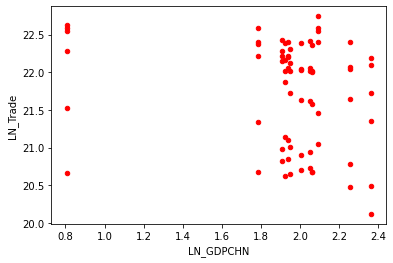

In [270]:
 data.plot(x = 'LN_GDPCHN', y = 'LN_Trade', kind = 'scatter', c = 'r')

C:\Users\markt\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='LN_GDPPartner', ylabel='LN_Trade'>

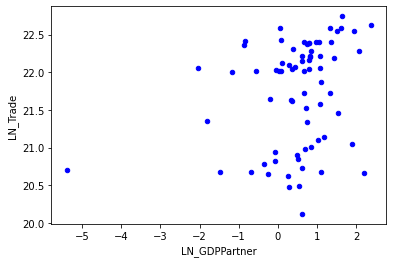

In [271]:
 data.plot(x = 'LN_GDPPartner', y = 'LN_Trade', kind = 'scatter', c = 'b')

In [272]:
dep_var1 = data["LN_GDPCHN"]
dep_var2 = data["LN_GDPPartner"]
exp_var1 = data["LN_Trade"]


In [273]:
exp_var1 = sm.add_constant(exp_var1)
exp_var1


,const,LN_Trade
0,1.0,22.185866
1,1.0,22.399555
2,1.0,22.365161
3,1.0,22.409972
4,1.0,22.382134
...,...,...
67,1.0,20.851648
68,1.0,20.821635
69,1.0,20.680626
70,1.0,20.664296


-TRADE ON CHINA GDP


In [274]:
model1 = sm.OLS(dep_var1, exp_var1)
result = model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              LN_GDPCHN   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.626
Date:                Sun, 13 Nov 2022   Prob (F-statistic):              0.110
Time:                        13:54:23   Log-Likelihood:                -29.286
No. Observations:                  72   AIC:                             62.57
Df Residuals:                      70   BIC:                             67.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1331      1.361      3.037      0.0

Insights
- No reportable significance,

##How other factors of growth affect GDPCHN

In [275]:
exp_var5 = data[["LN_Distance","LN_PPOP","LN_EXRATE","TFREE_DIFF","COV19D","LNGDPPCD"]]
dep_var6 = data["LN_GDPCHN"]

exp_var5 = sm.add_constant(exp_var5)
exp_var5

model6 = sm.OLS(dep_var6, exp_var5)
result = model6.fit()
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:              LN_GDPCHN   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     12.82
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.70e-09
Time:                        13:54:23   Log-Likelihood:                -2.5033
No. Observations:                  72   AIC:                             19.01
Df Residuals:                      65   BIC:                             34.94
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7440      1.790      2.650      

Insights
- A 1percent increase in occurence of covid, decreased the GDP growth OF China by -0.62%
- A 1percent increase in difference in trade freedom between both countries, decreased the GDP growth OF China by -0.53%

-Trade on EU GDP


In [276]:
model2 = sm.OLS(dep_var2, exp_var1)
result = model2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          LN_GDPPartner   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     5.165
Date:                Sun, 13 Nov 2022   Prob (F-statistic):             0.0261
Time:                        13:54:23   Log-Likelihood:                -106.83
No. Observations:                  72   AIC:                             217.7
Df Residuals:                      70   BIC:                             222.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5956      3.996     -2.151      0.0

Insights
- A 1percent increase in trade, increased the GDP OF EU by 0.4percent

##Effect of other factors of growth on EU GDP

In [277]:
exp_var6 = data[["LN_Distance","LN_PPOP","LN_EXRATE","TFREE_DIFF","COV19D","LNGDPPCD"]]
dep_var7 = data["LN_GDPPartner"]

exp_var6 = sm.add_constant(exp_var6)
exp_var6

model7 = sm.OLS(dep_var7, exp_var6)
result = model7.fit()
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:          LN_GDPPartner   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     5.215
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           0.000196
Time:                        13:54:23   Log-Likelihood:                -95.248
No. Observations:                  72   AIC:                             204.5
Df Residuals:                      65   BIC:                             220.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0213      6.491      0.003      

Insights
- A 1percent increase in occurence of covid, increased the GDP OF EUpartners by 1.5percent


 #Using fixedeffects

In [278]:
Country = data["Country"]
Year = pd.Categorical(data["Year"])
data = data.set_index(["Country", "Year"])
data["Year"] = Year

dep_var8 = data["LN_GDPCHN"]
dep_var9 = data["LN_GDPPartner"]
exp_var7 = data["LN_Trade"]

exp_var7 = sm.add_constant(exp_var7)
exp_var7


const   LN_Trade
Country Year                  
Germany 2010    1.0  22.185866
        2011    1.0  22.399555
        2012    1.0  22.365161
        2013    1.0  22.409972
        2014    1.0  22.382134
...             ...        ...
Italy   2017    1.0  20.851648
        2018    1.0  20.821635
        2019    1.0  20.680626
        2020    1.0  20.664296
        2021    1.0  21.054887

[72 rows x 2 columns]

- Trade on China GDP


In [279]:
model8 = PanelOLS(dep_var8, exp_var7, entity_effects=True)
res = model8.fit()
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              LN_GDPCHN   R-squared:                        0.2398
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  72   R-squared (Within):               0.2398
Date:                Sun, Nov 13 2022   R-squared (Overall):             -1.1112
Time:                        13:54:24   Log-likelihood                   -20.740
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      20.506
Entities:                           6   P-value                           0.0000
Avg Obs:                       12.000   Distribution:                    F(1,65)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             20.506
                            

Insights
- A 1percent increase in TRADE, increased the GDP OF CHINA by -0.6percent

- TRADE ON EU GDP

In [280]:
model9 = PanelOLS(dep_var9, exp_var7, entity_effects=True)
res = model9.fit()
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:          LN_GDPPartner   R-squared:                        0.1472
Estimator:                   PanelOLS   R-squared (Between):             -14.739
No. Observations:                  72   R-squared (Within):               0.1472
Date:                Sun, Nov 13 2022   R-squared (Overall):             -0.4306
Time:                        13:54:24   Log-likelihood                   -102.24
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      11.219
Entities:                           6   P-value                           0.0014
Avg Obs:                       12.000   Distribution:                    F(1,65)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             11.219
                            

Insights
- A 1percent increase in TRADE, increased the GDP OF EU by 1.5percent

- Other factors of trade on gdp china


In [282]:
exp_var10 = data[["LN_Distance","LN_PPOP","LN_EXRATE","TFREE_DIFF","COV19D","LNGDPPCD"]]
dep_var8 = data["LN_GDPCHN"]

exp_var10 = sm.add_constant(exp_var10)
exp_var10

model10 = PanelOLS(dep_var8, exp_var10, entity_effects=True)
res = model10.fit()
print(res)


                          PanelOLS Estimation Summary                           
Dep. Variable:              LN_GDPCHN   R-squared:                        0.6716
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                  72   R-squared (Within):               0.6716
Date:                Sun, Nov 13 2022   R-squared (Overall):              0.4396
Time:                        13:54:24   Log-likelihood                    9.4731
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      20.449
Entities:                           6   P-value                           0.0000
Avg Obs:                       12.000   Distribution:                    F(6,60)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             20.449
                            

Insights
- A 1percent increase in Difference in TRADE Freedom between both countries, reduced the GDP OF CHINA by -1.2 percent
- A 1percent increase in Covid occurence between both countries, reduced the GDP OF CHINA by -1.04 percent

- Other factors of economic growth on gdp EU

In [290]:
exp_var10 = data[["LN_Distance","LN_PPOP","LN_EXRATE","TFREE_DIFF","COV19D","LNGDPPCD"]]
dep_var9 = data["LN_GDPPartner"]

exp_var10 = sm.add_constant(exp_var10)
exp_var10

model12 = PanelOLS(dep_var9, exp_var10, entity_effects=True)
res = model12.fit()
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:          LN_GDPPartner   R-squared:                        0.3664
Estimator:                   PanelOLS   R-squared (Between):             -2.7660
No. Observations:                  72   R-squared (Within):               0.3664
Date:                Sun, Nov 13 2022   R-squared (Overall):              0.2448
Time:                        20:57:50   Log-likelihood                   -91.544
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      5.7824
Entities:                           6   P-value                           0.0001
Avg Obs:                       12.000   Distribution:                    F(6,60)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             5.7824
                            

Insights

A 1percent increase in exchange rate between both countries, increased the GDP OF EU by 0.2 percent
A 1percent increase in Covid occurence between both countries, increased the GDP OF EU by 1.6 percent

 Other factors of economic growth on trade

In [286]:
exp_var10 = data[["LN_Distance","LN_PPOP","LN_EXRATE","TFREE_DIFF","COV19D","LNGDPPCD"]]
dep_var10 = data["LN_Trade"]

exp_var10 = sm.add_constant(exp_var10)
exp_var10

model12 = PanelOLS(dep_var10, exp_var10, entity_effects=True)
res = model12.fit()
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               LN_Trade   R-squared:                        0.4827
Estimator:                   PanelOLS   R-squared (Between):             -0.0842
No. Observations:                  72   R-squared (Within):               0.4827
Date:                Sun, Nov 13 2022   R-squared (Overall):              0.0013
Time:                        13:54:25   Log-likelihood                    15.999
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      9.3304
Entities:                           6   P-value                           0.0000
Avg Obs:                       12.000   Distribution:                    F(6,60)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             9.3304
                            

Insights

A 1percent increase in covid occurence, increased the trade by 0.4 percent
A 1percent increase in demand differences between both countries, decreased trade by -0.19 percent